In [1]:

import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
iphone_reviews=[]

In [9]:
########### Extracting reviews from snapdeal website ##############

iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [10]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [11]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [12]:
iphone_snapdeal

['I am really happy with product',
 'The piece delivered in good conditions... Received a discount of 1000rs on free charge coupon. Delivered within 2 days before committed delivery.',
 'Worth buying from snap deal due to its competitive price and good service\nThanks sd for the phone at this price',
 'Its an awesome phone',
 "D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all. I hv chosen d 8gb phone so it's my flaw. But in 1 word i just can say it is d best phone in dis price. Thumbs up APPLE",
 'Great product at such amazing price. Delivery was fast. N iPhone is amazing.',
 'Really happy with the product and service..always the best..:)',
 "The OS will take around 5GB, leaving only 3 GB for your files. Unless you'

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

In [14]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['I am really happy with product','The piece delivered in good conditions... Received a discount of 1000rs on free charge coupon. Delivered within 2 days before committed delivery.','Worth buying from snap deal due to its competitive price and good service\nThanks sd for the phone at this price','Its an awesome phone',"""D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all. I hv chosen d 8gb phone so it's my flaw. But in 1 word i just can say it is d best phone in dis price. Thumbs up APPLE""",'Great product at such amazing price. Delivery was fast. N iPhone is amazing.','Really happy with the product and service..always the best..:)',"""The OS will take around 5GB","leaving only 3 GB for your files. Unless you're not a heavy files user.""",'The 5C was delivered in a sealed box - crisp and brand new ! super deal.',...,'Quality product from snapdeal. Delivery was on time.','Very good one perfectly the original one with all original accessories','Good price,Great phone,very happy to own one. Recommending to everyone','I am happy with my new Iphone. Thanks you for providing me with the product of my choice with the best deal.',"""It's really 100% worth to buy this product. I am fully satisfied with this product.""","""It's good Value for the money paid . The Item was well packed and delivered on time .""",'Good buy at an affordable price during the sale.','Bought this for my dear wife as a surprise. Got delivered on time!']


In [15]:
ip_snapd=' '.join(ip_snapd)
ip_snapd

'[\'I am really happy with product\'  \'The piece delivered in good conditions... Received a discount of 1000rs on free charge coupon. Delivered within 2 days before committed delivery.\'  \'Worth buying from snap deal due to its competitive price and good service\\nThanks sd for the phone at this price\'  \'Its an awesome phone\'  "D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can\'t say dis is d phone\'s problem at all. I hv chosen d 8gb phone so it\'s my flaw. But in 1 word i just can say it is d best phone in dis price. Thumbs up APPLE"  \'Great product at such amazing price. Delivery was fast. N iPhone is amazing.\'  \'Really happy with the product and service..always the best..:)\'  "The OS will take around 5GB  leaving only 3 GB for your files. U

In [16]:
# Remove Punctuations 
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I am really happy with product  The piece delivered in good conditions Received a discount of 1000rs on free charge coupon Delivered within 2 days before committed delivery  Worth buying from snap deal due to its competitive price and good servicenThanks sd for the phone at this price  Its an awesome phone  D phone is good IOS is d best OS Safe also D phone looks great though it consists plastic body Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks Its camera is superb Battery also Dere is only one problem nd dat is space Bt I cant say dis is d phones problem at all I hv chosen d 8gb phone so its my flaw But in 1 word i just can say it is d best phone in dis price Thumbs up APPLE  Great product at such amazing price Delivery was fast N iPhone is amazing  Really happy with the product and servicealways the best  The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  The 5C was delivered in a seale

In [17]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I am really happy with product  The piece delivered in good conditions Received a discount of 1000rs on free charge coupon Delivered within 2 days before committed delivery  Worth buying from snap deal due to its competitive price and good servicenThanks sd for the phone at this price  Its an awesome phone  D phone is good IOS is d best OS Safe also D phone looks great though it consists plastic body Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks Its camera is superb Battery also Dere is only one problem nd dat is space Bt I cant say dis is d phones problem at all I hv chosen d 8gb phone so its my flaw But in 1 word i just can say it is d best phone in dis price Thumbs up APPLE  Great product at such amazing price Delivery was fast N iPhone is amazing  Really happy with the product and servicealways the best  The OS will take around 5GB  leaving only 3 GB for your files Unless youre not a heavy files user  The 5C was delivered in a seale

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SOUMYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', 'am', 'really', 'happy', 'with', 'product', 'The', 'piece', 'delivered', 'in', 'good', 'conditions', 'Received', 'a', 'discount', 'of', '1000rs', 'on', 'free', 'charge', 'coupon', 'Delivered', 'within', '2', 'days', 'before', 'committed', 'delivery', 'Worth', 'buying', 'from', 'snap', 'deal', 'due', 'to', 'its', 'competitive', 'price', 'and', 'good', 'servicenThanks', 'sd', 'for', 'the', 'phone', 'at', 'this', 'price', 'Its', 'an', 'awesome', 'phone', 'D', 'phone', 'is', 'good', 'IOS', 'is', 'd', 'best', 'OS', 'Safe', 'also', 'D', 'phone', 'looks', 'great', 'though', 'it', 'consists', 'plastic', 'body', 'Metal', 'body', 'looks', 'good', 'bt', 'dt', 'nt', 'means', 'plastic', 'body', 'looks', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'in', 'looks', 'Its', 'camera', 'is', 'superb', 'Battery', 'also', 'Dere', 'is', 'only', 'one', 'problem', 'nd', 'dat', 'is', 'space', 'Bt', 'I', 'cant', 'say', 'dis', 'is', 'd', 'phones', 'problem', 'at', 'all', 'I', 'hv', 'chosen', 'd', '8gb', 

In [20]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SOUMYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOUMYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:

# Tokens count
len(text_tokens)

1573

In [22]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['really', 'happy', 'product', 'The', 'piece', 'delivered', 'good', 'conditions', 'Received', 'discount', '1000rs', 'free', 'charge', 'coupon', 'Delivered', 'within', '2', 'days', 'committed', 'delivery', 'Worth', 'buying', 'snap', 'deal', 'due', 'competitive', 'price', 'good', 'servicenThanks', 'sd', 'phone', 'price', 'Its', 'awesome', 'phone', 'D', 'phone', 'good', 'IOS', 'best', 'OS', 'Safe', 'also', 'D', 'phone', 'looks', 'great', 'though', 'consists', 'plastic', 'body', 'Metal', 'body', 'looks', 'good', 'bt', 'dt', 'nt', 'means', 'plastic', 'body', 'looks', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'looks', 'Its', 'camera', 'superb', 'Battery', 'also', 'Dere', 'one', 'problem', 'nd', 'dat', 'space', 'Bt', 'cant', 'say', 'dis', 'phones', 'problem', 'hv', 'chosen', '8gb', 'phone', 'flaw', 'But', '1', 'word', 'say', 'best', 'phone', 'dis', 'price', 'Thumbs', 'APPLE', 'Great', 'product', 'amazing', 'price', 'Delivery', 'fast', 'N', 'iPhone', 'amazing', 'Really', 'happy', 'produc

In [23]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['apple', 'great', 'product', 'amazing', 'price', 'delivery', 'fast', 'n', 'iphone', 'amazing', 'really', 'happy', 'product', 'servicealways', 'best', 'the', 'os', 'take', 'around', '5gb', 'leaving', '3', 'gb', 'files', 'unless', 'youre', 'heavy', 'files', 'user', 'the', '5c', 'delivered', 'sealed', 'box', 'crisp', 'brand', 'new', 'super', 'deal', 'a', 'mush', 'deal', 'good', 'phone', 'mobile', 'oparating', 'essy', 'inter', 'net', 'fast', 'working', 'beautiful', 'product', 'original', 'apple', 'product', 'delivery', '2nd', 'daynand', 'iphone', 'iphone', 'price', 'delivery', 'service', 'good', 'received', 'order', 'time', 'easy', 'quick', 'returnsnoriginal', 'productsnngood', 'job', 'snapdealkeep', 'good', 'productthanks', 'snapdeal', 'sellers', 'delivered', 'original', 'phone', '0', 'nice', 'deal', 'snapdeal', 'good', 'shipping', 'service', 'bought', 'iphone', '5c', 'best', 'deal', 'ever', 'product', 'quite', 'good', 'also', 'updated', 'latest']


In [24]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['appl', 'great', 'product', 'amaz', 'price', 'deliveri', 'fast', 'n', 'iphon', 'amaz', 'realli', 'happi', 'product', 'servicealway', 'best', 'the', 'os', 'take', 'around', '5gb', 'leav', '3', 'gb', 'file', 'unless', 'your', 'heavi', 'file', 'user', 'the', '5c', 'deliv', 'seal', 'box', 'crisp', 'brand', 'new', 'super', 'deal', 'a', 'mush', 'deal', 'good', 'phone', 'mobil', 'opar', 'essi', 'inter', 'net', 'fast', 'work', 'beauti', 'product', 'origin', 'appl', 'product', 'deliveri', '2nd', 'daynand', 'iphon', 'iphon', 'price', 'deliveri', 'servic', 'good', 'receiv', 'order', 'time', 'easi', 'quick', 'returnsnorigin', 'productsnngood', 'job', 'snapdealkeep', 'good', 'productthank', 'snapdeal', 'seller', 'deliv', 'origin', 'phone', '0', 'nice', 'deal', 'snapdeal', 'good', 'ship', 'servic', 'bought', 'iphon', '5c', 'best', 'deal', 'ever', 'product', 'quit', 'good', 'also', 'updat', 'latest']


In [25]:
!pip3 install en_core_web_sm
!python -m spacy download 

2021-10-02 16:42:42.265014: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-10-02 16:42:42.267138: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Usage: python -m spacy download [OPTIONS] MODEL
Try 'python -m spacy download --help' for help.

Error: Missing argument 'MODEL'.


In [26]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

really happy product the piece delivered good conditions received discount 1000rs free charge coupon delivered within 2 days committed delivery worth buying snap deal due competitive price good servicenthanks sd phone price its awesome phone d phone good ios best os safe also d phone looks great though consists plastic body metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice looks its camera superb battery also dere one problem nd dat space bt cant say dis phones problem hv chosen 8gb phone flaw but 1 word say best phone dis price thumbs apple great product amazing price delivery fast n iphone amazing really happy product servicealways best the os take around 5gb leaving 3 gb files unless youre heavy files user the 5c delivered sealed box crisp brand new super deal a mush deal good phone mobile oparating essy inter net fast working beautiful product original apple product delivery 2nd daynand iphone iphone price delivery service good received order tim

In [27]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['really', 'happy', 'product', 'the', 'piece', 'deliver', 'good', 'condition', 'receive', 'discount', '1000r', 'free', 'charge', 'coupon', 'deliver', 'within', '2', 'day', 'commit', 'delivery', 'worth', 'buy', 'snap', 'deal', 'due', 'competitive', 'price', 'good', 'servicenthank', 'sd', 'phone', 'price', 'its', 'awesome', 'phone', 'd', 'phone', 'good', 'io', 'well', 'os', 'safe', 'also', 'd', 'phone', 'look', 'great', 'though', 'consist', 'plastic', 'body', 'metal', 'body', 'look', 'good', 'bt', 'dt', 'nt', 'mean', 'plastic', 'body', 'look', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'look', 'its', 'camera', 'superb', 'battery', 'also', 'dere', 'one', 'problem', 'nd', 'dat', 'space', 'bt', 'ca', 'nt', 'say', 'dis', 'phone', 'problem', 'hv', 'choose', '8', 'gb', 'phone', 'flaw', 'but', '1', 'word', 'say', 'good', 'phone', 'dis', 'price', 'thumb', 'apple', 'great', 'product', 'amazing', 'price', 'delivery', 'fast', 'n', 'iphone', 'amazing', 'really', 'happy', 'product', 'servicealwa

In [28]:
clean_comments=' '.join(lemmas)
clean_comments

'really happy product the piece deliver good condition receive discount 1000r free charge coupon deliver within 2 day commit delivery worth buy snap deal due competitive price good servicenthank sd phone price its awesome phone d phone good io well os safe also d phone look great though consist plastic body metal body look good bt dt nt mean plastic body look cheap plastic may also b nice look its camera superb battery also dere one problem nd dat space bt ca nt say dis phone problem hv choose 8 gb phone flaw but 1 word say good phone dis price thumb apple great product amazing price delivery fast n iphone amazing really happy product servicealway good the os take around 5 gb leave 3 gb file unless you re heavy file user the 5c deliver seal box crisp brand new super deal a mush deal good phone mobile oparating essy inter net fast work beautiful product original apple product delivery 2nd daynand iphone iphone price delivery service good receive order time easy quick returnsnoriginal pr

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [30]:

print(cv.vocabulary_)

{'really': 285, 'happy': 152, 'product': 262, 'the': 357, 'piece': 247, 'deliver': 96, 'good': 143, 'condition': 74, 'receive': 286, 'discount': 101, '1000r': 2, 'free': 135, 'charge': 62, 'coupon': 80, 'within': 399, 'day': 90, 'commit': 70, 'delivery': 97, 'worth': 404, 'buy': 54, 'snap': 331, 'deal': 92, 'due': 109, 'competitive': 72, 'price': 254, 'servicenthank': 312, 'sd': 305, 'phone': 243, 'its': 179, 'awesome': 33, 'io': 170, 'well': 394, 'os': 233, 'safe': 296, 'also': 21, 'look': 191, 'great': 148, 'though': 364, 'consist': 76, 'plastic': 248, 'body': 45, 'metal': 204, 'bt': 49, 'dt': 108, 'nt': 223, 'mean': 200, 'cheap': 63, 'may': 199, 'nice': 220, 'camera': 56, 'superb': 346, 'battery': 38, 'dere': 99, 'one': 226, 'problem': 260, 'nd': 214, 'dat': 88, 'space': 338, 'ca': 55, 'say': 302, 'dis': 100, 'hv': 164, 'choose': 65, 'gb': 138, 'flaw': 133, 'but': 53, 'word': 402, 'thumb': 365, 'apple': 28, 'amazing': 23, 'fast': 124, 'iphone': 172, 'servicealway': 311, 'take': 350,

In [31]:
print(cv.get_feature_names()[100:200])

['dis', 'discount', 'dispatchnprosn1', 'display', 'do', 'doubt', 'doubtfull', 'dream', 'dt', 'due', 'earn', 'easy', 'eliveryi', 'emi', 'essy', 'even', 'ever', 'everyone', 'everything', 'excellent', 'expectation', 'experience', 'fake', 'family', 'fast', 'feature', 'feel', 'file', 'fill', 'find', 'finger', 'first', 'five', 'flaw', 'fraudulent', 'free', 'friend', 'fully', 'gb', 'genuine', 'get', 'gift', 'go', 'good', 'goodbut', 'goood', 'got', 'grand', 'great', 'guess', 'hahahaha', 'hang', 'happy', 'happyalso', 'have', 'headphone', 'hear', 'heat', 'heavy', 'hesitate', 'honest', 'honestly', 'hour', 'however', 'hv', 'in', 'initially', 'inter', 'interaction', 'interest', 'io', 'ios9', 'iphone', 'iphone5c', 'iphoneearlier', 'issue', 'it', 'item', 'itnniphone', 'its', 'job', 'lack', 'lag', 'lagging', 'late', 'leave', 'level', 'like', 'limit', 'listnnapple', 'little', 'look', 'love', 'lovely', 'low', 'make', 'manufacturer', 'mark', 'marvallous', 'may']


In [32]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:

print(clean_commentscv.toarray().shape)

(1028, 409)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [35]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '1000r', '2030', '20k', '24', '2nd', '5c', '5cnnsnapdeal', '6s', '9nncon', 'absolutly', 'accessory', 'account', 'action', 'ad', 'adorable', 'affordable', 'after', 'almost', 'already', 'also', 'always', 'amazing', 'and', 'andriodblackberrywindow', 'android', 'app', 'apple', 'around', 'as', 'attractive', 'available', 'awesome', 'awesum', 'awsme', 'awwsum', 'back', 'battery', 'be', 'beatifully', 'beautiful', 'believe', 'bit', 'bluetooth', 'body', 'bodyn2', 'box', 'brand', 'bt', 'budget', 'build', 'business', 'but', 'buy', 'ca', 'camera', 'can', 'capacity', 'care', 'category', 'cell', 'charge', 'cheap', 'choice', 'choose', 'class', 'close', 'colour', 'come', 'commit', 'compare', 'competitive', 'con', 'condition', 'conditionnno', 'consist', 'contact', 'cool', 'costly', 'coupon', 'courier', 'cr', 'crazy', 'credit', 'crisp', 'customer', 'damage', 'dat', 'datum', 'day', 'daynand', 'deal', 'dear', 'decide', 'defination', 'deliver', 'delivery', 'delivry', 'dere', 'dis', 'discount',

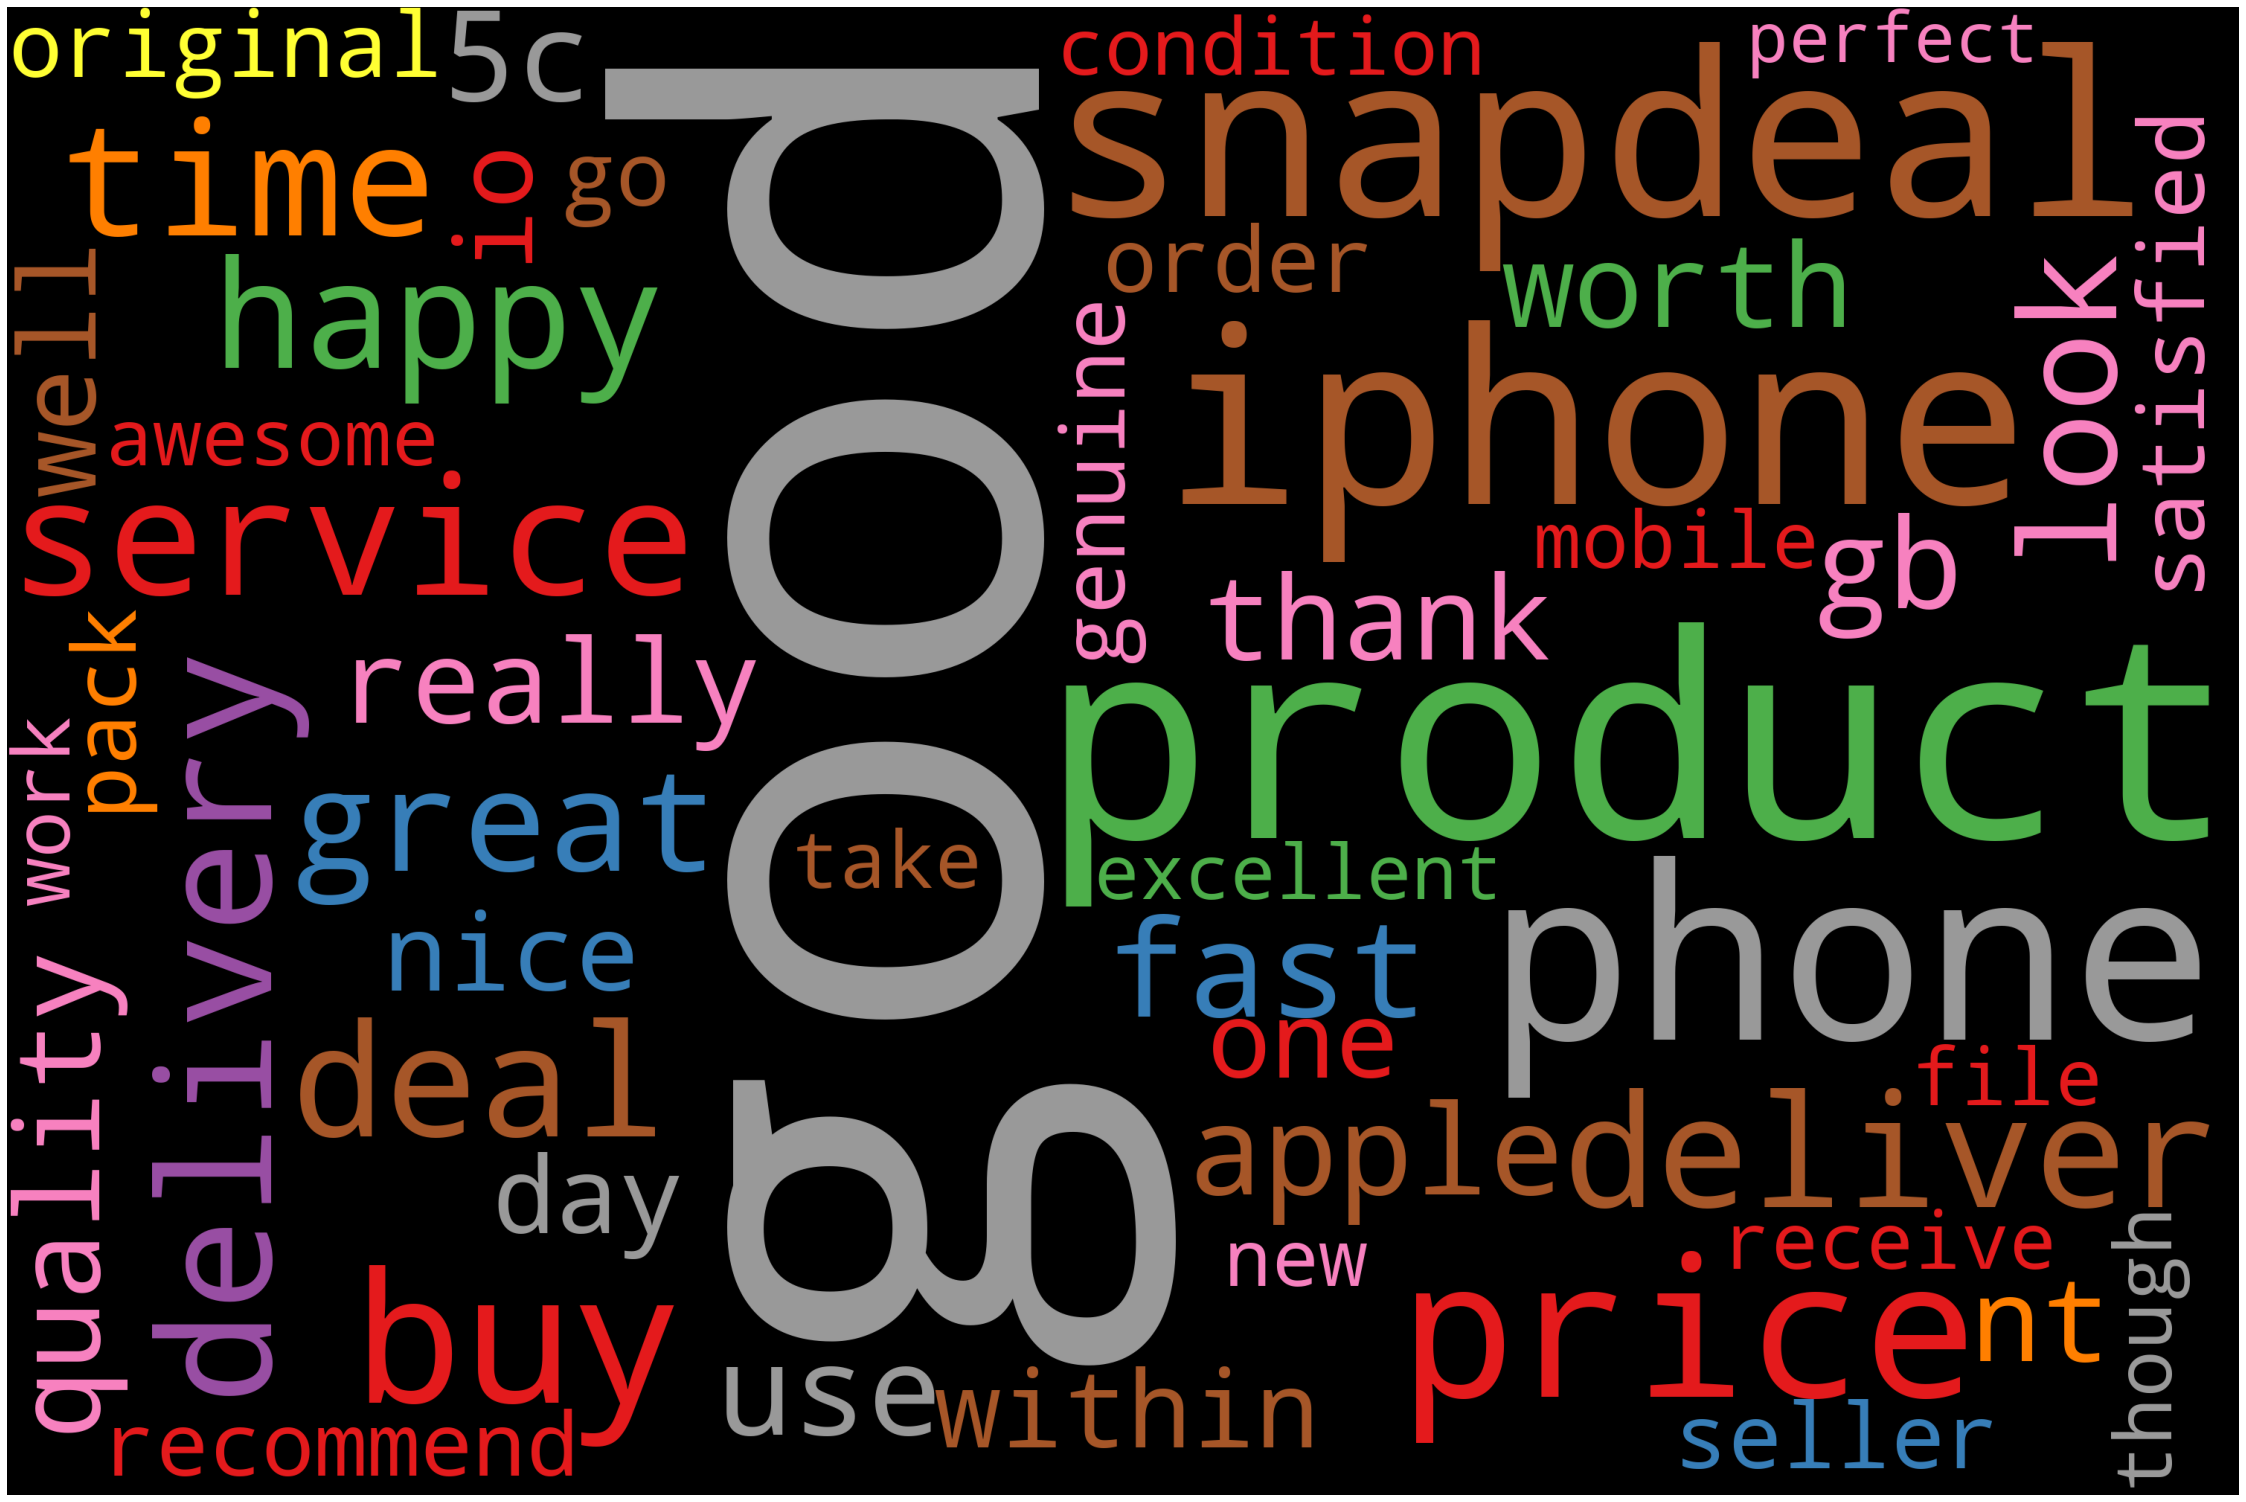

In [36]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

In [37]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [38]:
for token in doc_block[100:200]:
    print(token,token.pos_)

price NOUN
thumb NOUN
apple NOUN
great ADJ
product NOUN
amazing ADJ
price NOUN
delivery NOUN
fast ADV
n CCONJ
iphone NOUN
amazing ADJ
really ADV
happy ADJ
product NOUN
servicealway VERB
good ADJ
the DET
os PROPN
take VERB
around ADV
5 NUM
gb NOUN
leave VERB
3 NUM
gb PROPN
file NOUN
unless SCONJ
you PRON
re VERB
heavy ADJ
file NOUN
user NOUN
the DET
5c PROPN
deliver VERB
seal NOUN
box NOUN
crisp ADJ
brand NOUN
new ADJ
super NOUN
deal VERB
a DET
mush NOUN
deal NOUN
good ADJ
phone NOUN
mobile ADJ
oparating NOUN
essy NOUN
inter ADJ
net ADJ
fast ADJ
work NOUN
beautiful ADJ
product NOUN
original ADJ
apple NOUN
product NOUN
delivery NOUN
2nd NOUN
daynand NOUN
iphone NOUN
iphone NOUN
price NOUN
delivery NOUN
service NOUN
good ADJ
receive VERB
order NOUN
time NOUN
easy ADV
quick ADJ
returnsnoriginal ADJ
productsnngood NOUN
job NOUN
snapdealkeep VERB
good ADJ
productthank ADJ
snapdeal ADJ
seller NOUN
deliver VERB
original ADJ
phone NOUN
0 NUM
nice ADJ
deal NOUN
snapdeal ADJ
good ADJ
shipping NOU

In [39]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['phone', 'deal', 'shipping', 'service', 'buy', 'iphone', 'deal', 'product', 'update', 'deal', 'budget', 'iphone', 'go', 'want', 'iphone', 'experience', 'budget', 'product', 'get', 'switch', 'android', 'apple', 'iphone', 'camera', 'display', 'battery', 'issue', 'solve', 'update', 'feature', 'goodbut', 'phone', 'get', 'heat', 'time', 'goood', 'shipping', 'get', 'phone', 'condition', 'thank', 'eliveryi', 'guess', 'ur', 'earn', 'trust', 'thing', 'u', 'need', 'buy', 'year', 'conditionnno', 'lagging', 'business', 'need', 'product', 'awwsum', 'use', 'look', 'defination', 'prefer', 'nxt', 'time', 'price', 'feature', 'performance', 'awesum', 'phonegood', 'price', 'product', 'recommend', 'friend', 'family', 'member', 'phone', 'price', 'category', 'manufacturer', 'warranty', 'iphone', 'apple', 'service', 'iphone', 'price', 'rangeni', 'recommend', 'phone', 'offer', 'product', 'customer', 'care', 'sell', 'iphone', 'interest', 'emi', 'scheme', 'phone', 'seller', 'price', 'interest']


In [40]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,product,39
1,phone,28
2,iphone,28
3,price,17
4,buy,15
5,service,12
6,deliver,11
7,delivery,11
8,deal,11
9,time,11


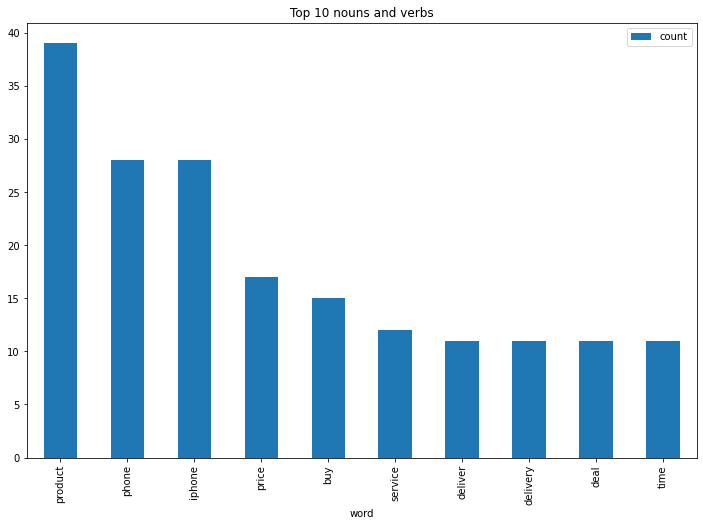

In [41]:

# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [43]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Apple is looking at buying U.K. startup for $1...
1,Autonomous cars shift insurance liability towa...
2,San Francisco considers banning sidewalk deliv...
3,London is a big city in the United Kingdom.
4,Where are you?
5,Who is the president of France?
6,What is the capital of the United States?
7,When was Barack Obama born?


In [44]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [45]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [46]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [47]:

# manual testing
calculate_sentiment(text='great')

3

In [48]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0    0
1    0
2   -2
3    1
4    0
5    0
6    0
7    0
Name: sentiment_value, dtype: int64

In [49]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0    10
1     7
2     7
3     9
4     3
5     6
6     8
7     5
Name: word_count, dtype: int64

In [50]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
2,San Francisco considers banning sidewalk deliv...,-2,7
0,Apple is looking at buying U.K. startup for $1...,0,10
1,Autonomous cars shift insurance liability towa...,0,7
4,Where are you?,0,3
5,Who is the president of France?,0,6
6,What is the capital of the United States?,0,8
7,When was Barack Obama born?,0,5
3,London is a big city in the United Kingdom.,1,9


In [51]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
3,London is a big city in the United Kingdom.,1,9


In [52]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Apple is looking at buying U.K. startup for $1...,0,10,0
1,Autonomous cars shift insurance liability towa...,0,7,1
2,San Francisco considers banning sidewalk deliv...,-2,7,2
3,London is a big city in the United Kingdom.,1,9,3
4,Where are you?,0,3,4
5,Who is the president of France?,0,6,5
6,What is the capital of the United States?,0,8,6
7,When was Barack Obama born?,0,5,7


C:\Users\SOUMYA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


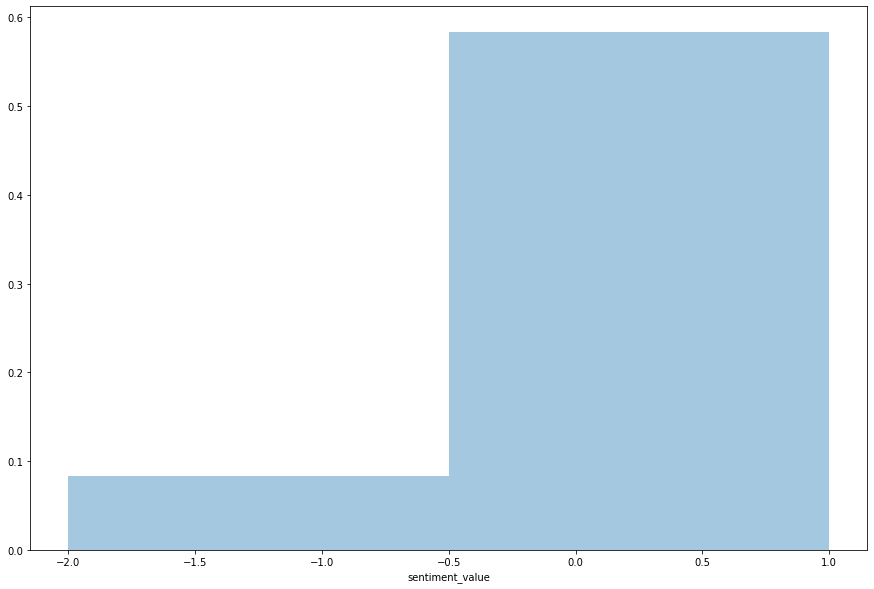

In [53]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

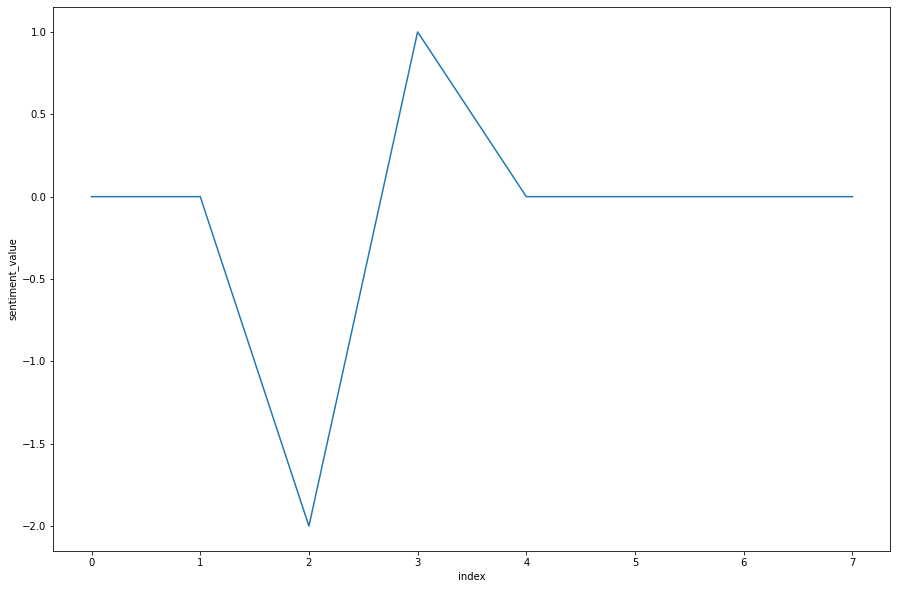

In [54]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

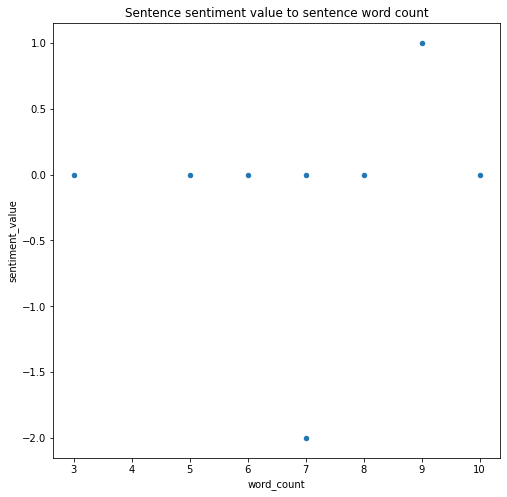

In [55]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import string

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline
from matplotlib.pyplot import imread

In [9]:
tweets=pd.read_csv("Elon_musk.csv",encoding='latin1',error_bad_lines=False,index_col=0)
#error_bad_lines=False means where there is empty lines just ignore that making it False

C:\Users\SOUMYA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
tweets

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [10]:
tweets=[Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [11]:
# Joining the list into one string/text
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [12]:

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [13]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SOUMYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:

# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [16]:
# Remove Punctuations 
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [17]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [18]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SOUMYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [20]:
# Tokenization
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOUMYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Tokens count
len(text_tokens)

17847

In [22]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cash', 'flo

In [23]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', 'missing', 'back', 'work', 'go', 'does', 'seem', 'bit', 'high', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit', 'time', 'whereas', 'wow', '1', 'orbital', 'launch', 'tower', 'stack', '2', 'enough', 'raptors', 'orbit', 'booster']


In [24]:

# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'miss', 'back', 'work', 'go', 'doe', 'seem', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', 'wow', '1', 'orbit', 'launch', 'tower', 'stack', '2', 'enough', 'raptor', 'orbit', 'booster']


In [26]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended earth 

In [27]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'star

In [28]:
clean_tweets=' '.join(lemmas)
clean_tweets

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mars xprize team manage 100 m 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [30]:
print(cv.vocabulary_)

{'alien': 194, 'ray': 2359, 'trace': 3026, 'cyberpunk': 768, 'hdr': 1363, 'nextlevel': 1968, 'have': 1358, 'try': 3057, 'great': 1310, 'interview': 1559, 'doge': 893, 'underestimate': 3190, 'congratulation': 677, 'tesla': 2933, 'china': 586, 'amazing': 216, 'execution': 1060, 'last': 1643, 'year': 3406, 'now': 1995, 'next': 1967, 'even': 1033, 'happy': 1345, 'new': 1965, 'ox': 2097, 'frodo': 1208, 'underdoge': 3189, 'all': 196, 'think': 2961, 'would': 3392, 'fail': 1094, 'himself': 1404, 'haha': 1333, 'thank': 2943, 'indeed': 1500, 'tweet': 3072, 'definitely': 805, 'represent': 2426, 'realworld': 2374, 'time': 2984, 'allocation': 198, 'the': 2947, 'entertaining': 1003, 'outcome': 2076, 'likely': 1698, 'just': 1601, 'send': 2568, 'agree': 179, 'clubhouse': 615, 'it': 1578, 'get': 1268, 'real': 2369, 'buy': 504, 'dogecoin': 895, 'lil': 1699, 'toddler': 2997, 'hodler': 1410, 'he': 1364, 'issue': 1577, 'sentencing': 2573, 'seem': 2560, 'bit': 419, 'high': 1397, 'fix': 1155, 'please': 2191,

In [31]:
pd.DataFrame.from_records([cv.vocabulary_]).T.sort_values(0,ascending=False)

,0
ðogecoin,3425
zone,3424
zon,3423
zip,3422
zero,3421
...,...
1000,4
100,3
10,2
005,1


In [32]:
print(cv.get_feature_names()[100:200])

['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align', 'all', 'allocati', 'allocati

In [33]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
print(tweetscv.toarray().shape)

(11486, 3426)


In [35]:

cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [36]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'just', 'land', 'launch', 'life', 'like', 'look', 'lot', 'make', 'many', 'maybe', 'mission', 'model', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [38]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '2020', '30', '300', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'approval', 'arm', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'cast', 'catch', 'cell', 'chance', 'change', 'china', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'design', 'detail', 'difference', 'different', 'do', 'dock', '

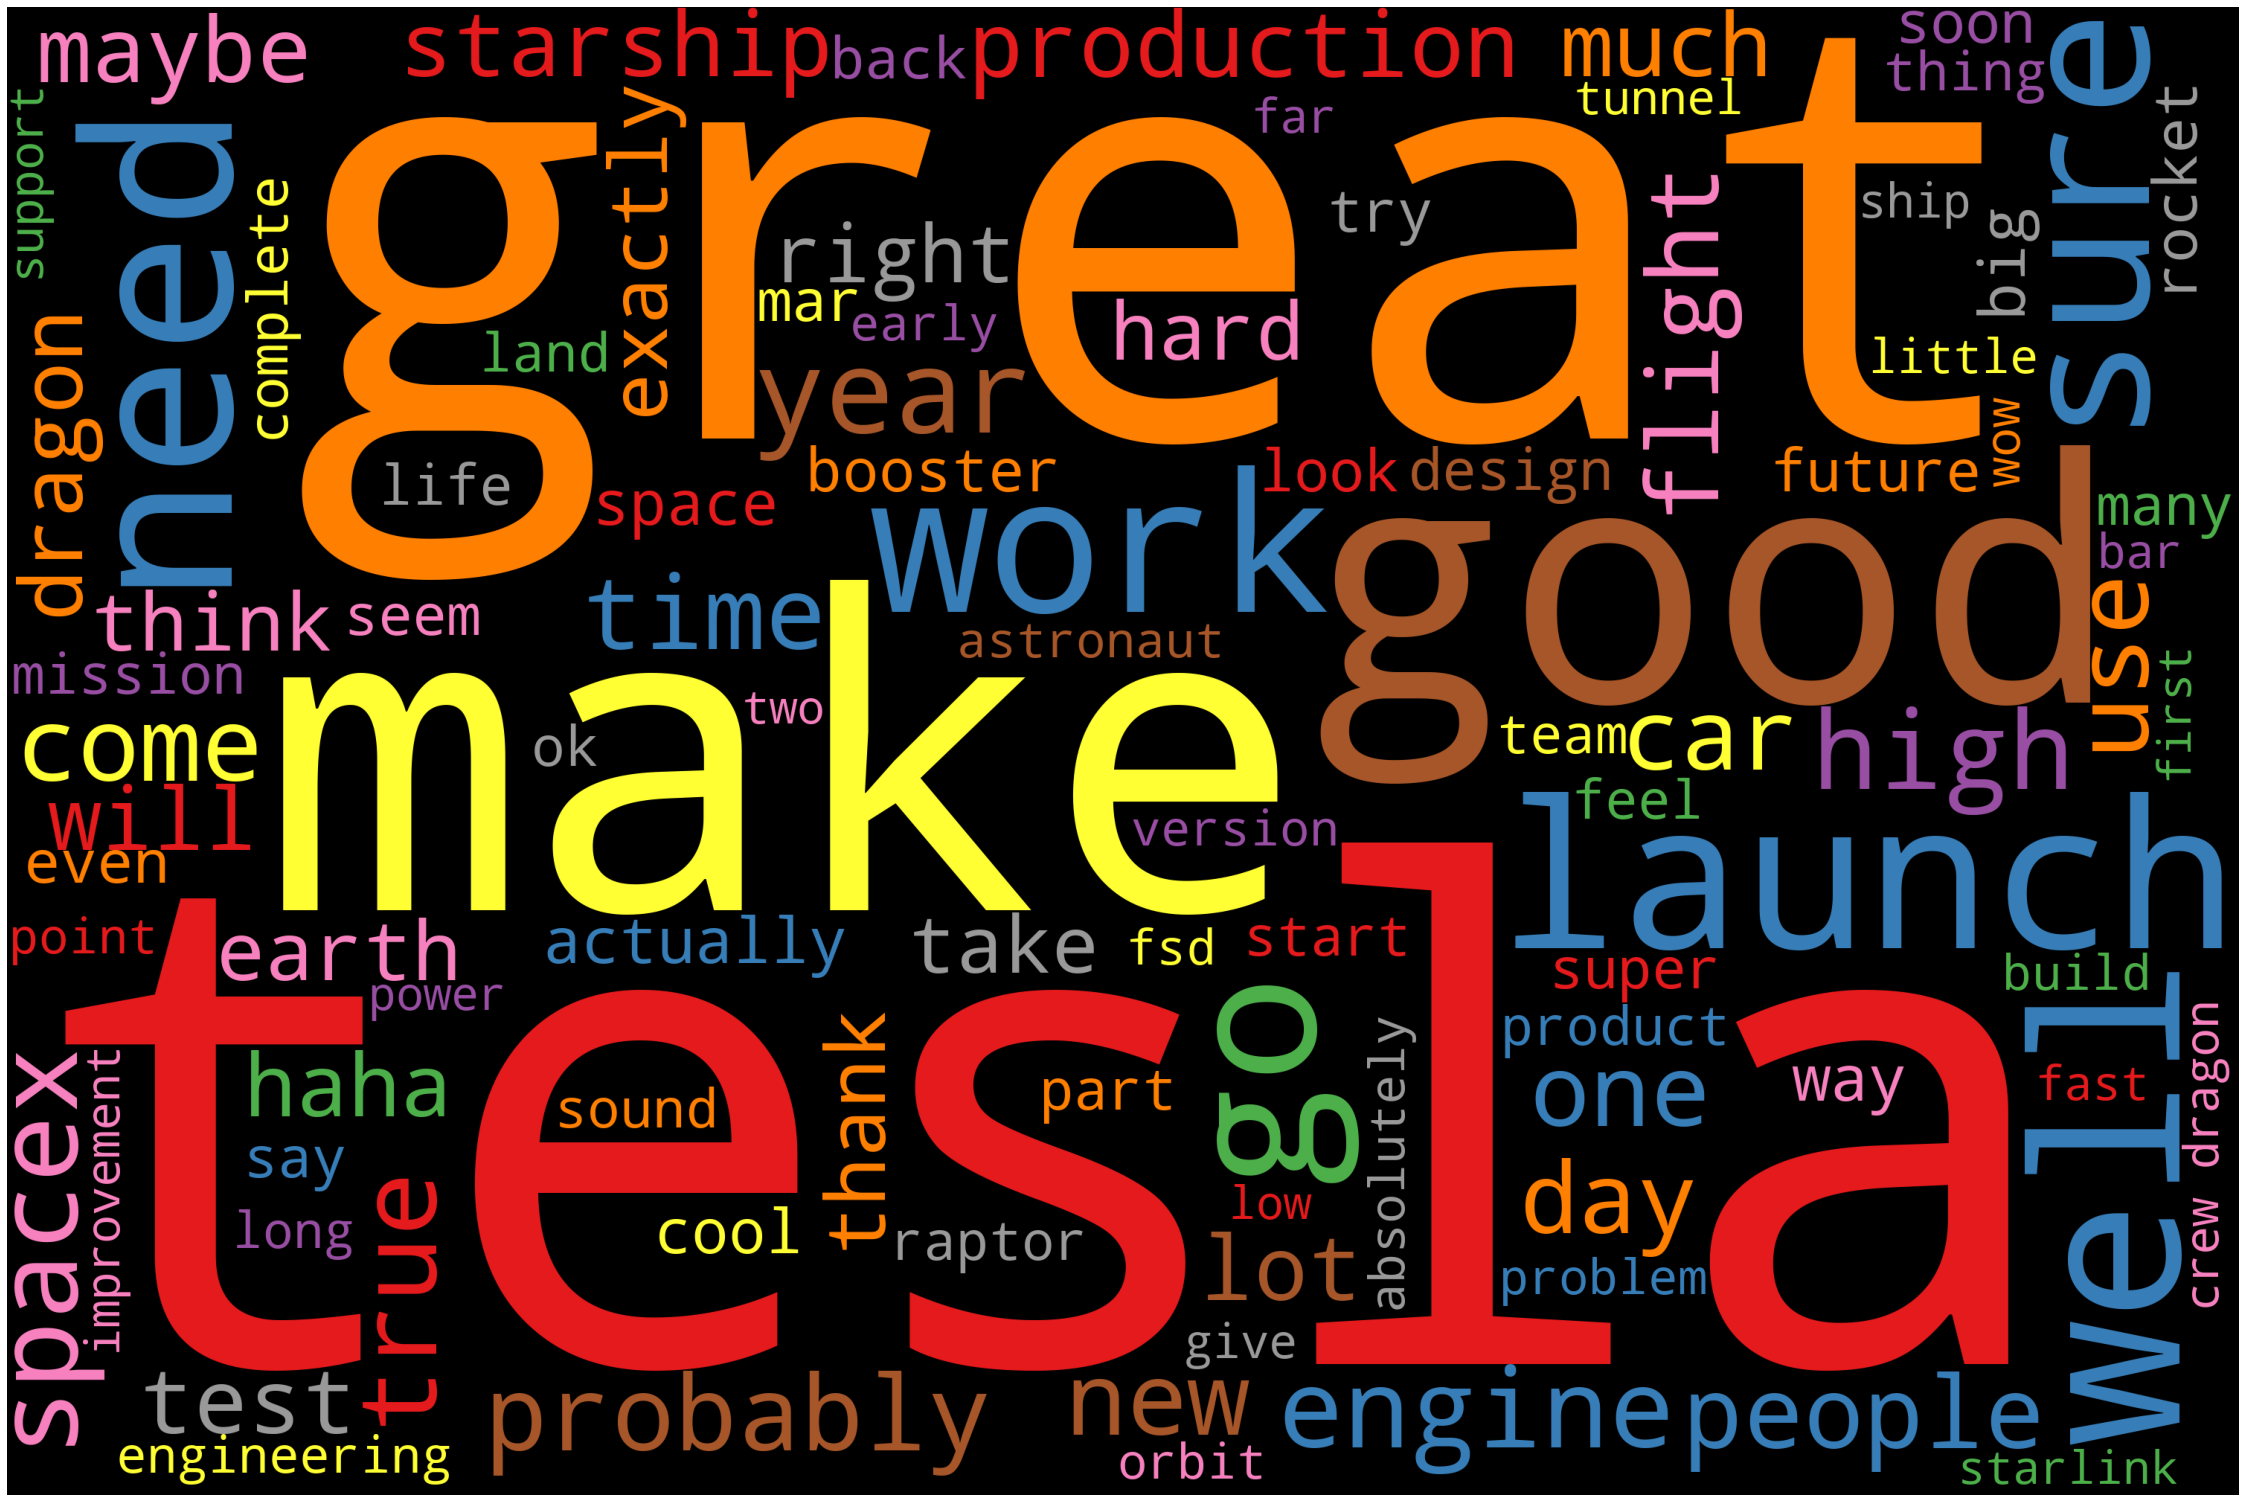

In [39]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [40]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [41]:
for token in doc_block[100:200]:
    print(token,token.pos_)

once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo NOUN
starlink VERB
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex AUX
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g PROPN
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this DET
intend ADJ
earth NOUN
may AUX
idea NOUN
apply VERB
mars PROPN
xprize NOUN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize PROPN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that DET
miss VERB
back ADP
work NOUN
go VERB
do AUX
seem VERB
bit NOUN
high ADJ
doge NOUN
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin NOUN
per ADP
unit NOUN
time NOUN
whereas SCONJ
wow INTJ
1 NUM
orbita

In [42]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['improve', 'ship', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'let', 'doge', 'rainforest', 'come', 'fun', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'earth', 'time', 'tell', 'story', 'spacex', 'read', 'hear', 'name', 'year', 'dogecake', 'yolt', 'damian', 'thing', 'restaurant', 'get', 'currency', 'earth', 'scratch', 'u0001f5a4', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'flameout', 'risk', 'start', 'engine', 'shut', 'need', 'land', 'become', 'destroyer', 'happen', 'sandstorm', 'masterpiece', 'dumb', 'time', 'try']


In [43]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,make,64
1,launch,61
2,year,49
3,work,48
4,need,45
5,go,42
6,come,40
7,get,38
8,day,38
9,time,36


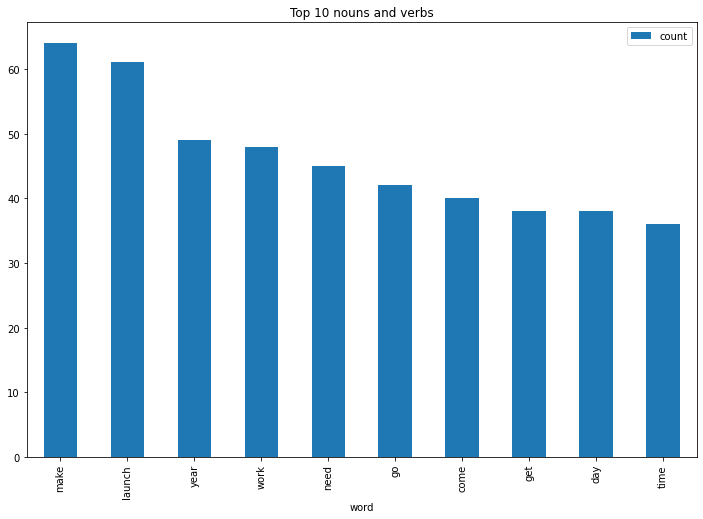

In [44]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [45]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [46]:

sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [48]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [49]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [50]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores
def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [51]:

# manual testing
calculate_sentiment(text='adorable')

3

In [52]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [53]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [54]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
920,"It may never pay out, as the stock cant b ht...",-4,31
680,"Occasional flights from land are ok, but frequ...",-4,39
...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231


In [55]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.392857
std        2.684249
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [56]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [57]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",7,15
917,This is both great &amp; terrifying.,3,6


In [58]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


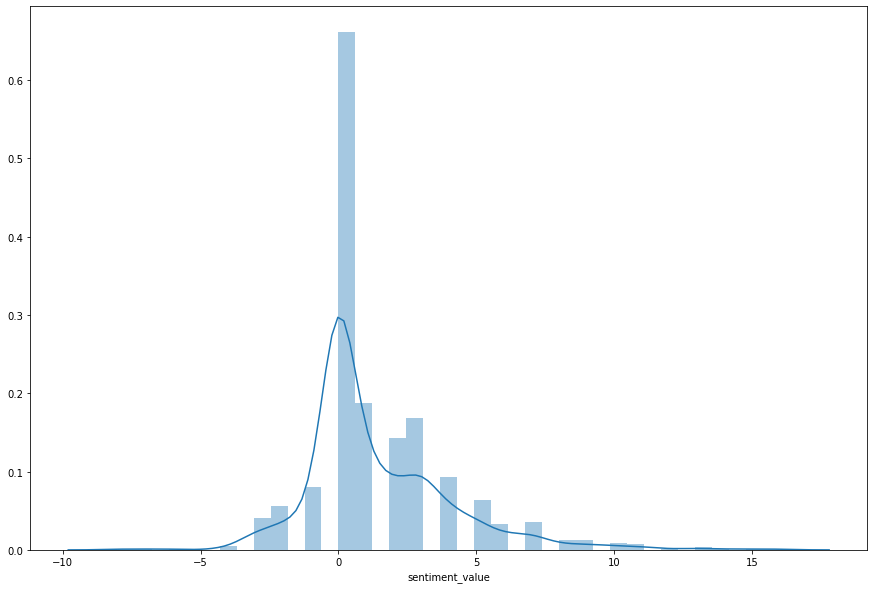

In [59]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])